In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns

### EDA +  Data Preprocessing

#### Loading defending stats for the past 5 seasons

In [68]:
defend22 = pd.read_csv("22defend.csv",encoding='ISO-8859-1',header=1)
defend21 = pd.read_csv("21defend.csv",encoding='ISO-8859-1',header=1)
defend20 = pd.read_csv("20defend.csv",encoding='ISO-8859-1',header=1)
defend19 = pd.read_csv("19defend.csv",encoding='ISO-8859-1',header=1)
defend18 = pd.read_csv("18defend.csv",encoding='ISO-8859-1',header=1)

defend = pd.concat([defend22, defend21, defend20, defend19,defend18])


defend.head()

,Player,Nation,Pos,Squad,Age,Born,90s,Tkl,TklW,Def 3rd,...,Tkl%,Lost,Blocks,Sh,Pass,Int,Tkl+Int,Clr,Err,-9999
0,Max Aarons,eng ENG,DF,Norwich City,21,2000,32.0,64.0,44.0,49.0,...,67.3,18.0,39.0,19.0,20.0,28.0,92.0,96.0,1.0,774cf58b
1,Che Adams,sct SCO,FW,Southampton,25,1996,22.7,13.0,6.0,5.0,...,12.5,14.0,18.0,2.0,16.0,8.0,21.0,18.0,0.0,f2bf1b0f
2,Rayan Aït Nouri,fr FRA,DFMF,Wolves,20,2001,20.3,64.0,36.0,46.0,...,50.0,22.0,24.0,2.0,22.0,22.0,86.0,39.0,1.0,9b398aea
3,Kristoffer Ajer,no NOR,DF,Brentford,23,1998,22.2,29.0,18.0,21.0,...,61.9,8.0,19.0,11.0,8.0,26.0,55.0,74.0,0.0,a8c0acb7
4,Nathan Aké,nl NED,DF,Manchester City,26,1995,10.3,16.0,9.0,7.0,...,75.0,2.0,7.0,5.0,2.0,8.0,24.0,23.0,0.0,eaeca114


#### Checking for missing values

In [70]:
def missing_statistics(df):
    '''
        Calculates missing value statistics for a given dataframe and
        returns a dataframe containing number of missing values per column
        and the percentage of values missing per column.
        arguments:
            df: the dataframe for which missing values need to be calculated.
    '''
    missing_stats = df.isnull().sum().to_frame()
    missing_stats.columns = ['num_missing']
    missing_stats['pct_missing'] = np.round(100 * (missing_stats['num_missing'] / df.shape[0]))
    missing_stats.sort_values(by='num_missing', ascending=False, inplace=True)

    return missing_stats

In [72]:
pd.set_option('display.max_row', None)
num_missing = missing_statistics(defend)
num_missing

,num_missing,pct_missing
Tkl%,291,11.0
Tkl.1,2,0.0
Blocks,2,0.0
Err,2,0.0
Clr,2,0.0
Tkl+Int,2,0.0
Pass,2,0.0
Tkl,2,0.0
Def 3rd,2,0.0
Mid 3rd,2,0.0


#### Tkl% has a significant amount of missing values but this stat is not relevant to defending. We will replacing missing values with 0 as it does not affect the other features much and it is an easy imputation method.

In [75]:
defend = defend.fillna(0)
#defend.to_csv('defendcombined.csv', index=False)


C:\Users\Bimal\AppData\Local\Temp/ipykernel_3816/3809954481.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_matrix, dtype=np.bool)


<AxesSubplot:>

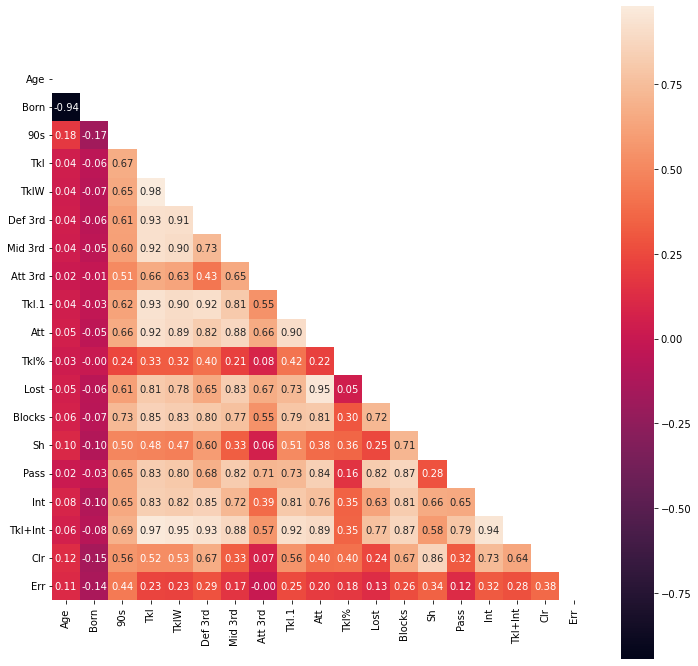

In [77]:
#Just pull numeric data
corr_matrix = defend.select_dtypes('number').corr()

corr_matrix = defend.select_dtypes(include=[np.number]).corr()
# create mask to just show one side of the square
# plot correlation matrix
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', mask=mask, square=True)

#### After removing highly correlated features and features that repeat in other datasets, we are left with the following features: 

TklW= number of tackles won

Sh=  number of times blocking the ball by standing in its path 

Err= mistakes leading to an opponent's shot

We believe these are the most relevant features in determining the defensive quality of a player.

#### We are going to repeat the process above of merging, replacing null values and looking at correlation to narrow down the important features for the goal shot creation file

In [79]:
goalshotcreation22 = pd.read_csv("22gsc.csv",encoding='ISO-8859-1',header=1)
goalshotcreation21 = pd.read_csv("21gsc.csv",encoding='ISO-8859-1',header=1)
goalshotcreation20 = pd.read_csv("20gsc.csv",encoding='ISO-8859-1',header=1)
goalshotcreation19 = pd.read_csv("19gsc.csv",encoding='ISO-8859-1',header=1)
goalshotcreation18 = pd.read_csv("18gsc.csv",encoding='ISO-8859-1',header=1)

goalshotcreation = pd.concat([goalshotcreation22, goalshotcreation21, goalshotcreation20, goalshotcreation19,goalshotcreation18])


goalshotcreation.head()

,Player,Nation,Pos,Squad,Age,Born,90s,SCA,SCA90,PassLive,...,Def,GCA,GCA90,PassLive.1,PassDead.1,TO.1,Sh.1,Fld.1,Def.1,-9999
0,Max Aarons,eng ENG,DF,Norwich City,21,2000,32.0,46.0,1.44,34.0,...,1.0,3.0,0.09,3.0,0.0,0.0,0.0,0.0,0.0,774cf58b
1,Che Adams,sct SCO,FW,Southampton,25,1996,22.7,51.0,2.25,32.0,...,2.0,5.0,0.22,3.0,0.0,1.0,0.0,0.0,1.0,f2bf1b0f
2,Rayan Aït Nouri,fr FRA,DFMF,Wolves,20,2001,20.3,45.0,2.22,30.0,...,1.0,6.0,0.30,4.0,1.0,0.0,0.0,1.0,0.0,9b398aea
3,Kristoffer Ajer,no NOR,DF,Brentford,23,1998,22.2,33.0,1.50,22.0,...,1.0,7.0,0.32,3.0,1.0,2.0,0.0,1.0,0.0,a8c0acb7
4,Nathan Aké,nl NED,DF,Manchester City,26,1995,10.3,5.0,0.49,5.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,eaeca114


In [80]:
pd.set_option('display.max_row', None)
# calculate the number and pct of missing values for each variable
num_missing = missing_statistics(goalshotcreation)
num_missing

,num_missing,pct_missing
GCA90,3,0.0
SCA90,3,0.0
Sh,2,0.0
Def.1,2,0.0
Fld.1,2,0.0
Sh.1,2,0.0
TO.1,2,0.0
PassDead.1,2,0.0
SCA,2,0.0
PassLive,2,0.0


In [81]:
# replace null values with 0
goalshotcreation = goalshotcreation.fillna(0)
#goalshotcreation.to_csv("gsccombined.csv",index=False)



C:\Users\Bimal\AppData\Local\Temp/ipykernel_3816/694842970.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_matrix, dtype=np.bool)


<AxesSubplot:>

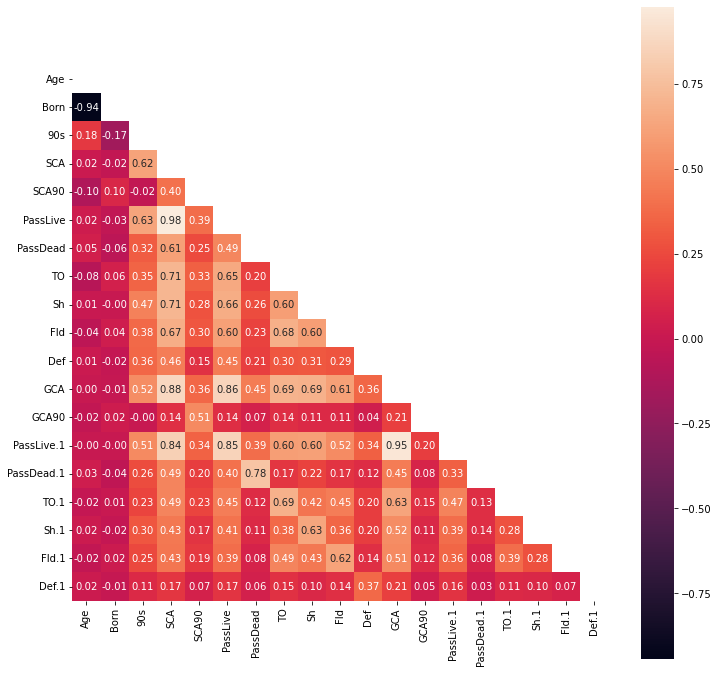

In [82]:
#Just pull numeric data
corr_matrix = goalshotcreation.select_dtypes('number').corr()

corr_matrix = goalshotcreation.select_dtypes(include=[np.number]).corr()
# create mask to just show one side of the square
# plot correlation matrix
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', mask=mask, square=True)

#### After removing highly correlated features and features that repeat in other datasets, we are left with  the following features ('Sca','Gca'): 

Gca= The two offensive actions directly leading to a goal, such as passes, take-ons and drawing fouls.

TO.1=  Successful take-ons that lead to a goal

Sh.1= Shots that lead to another goal-scoring shot

We believe these are the most relevant features in determining the ability of a player to create goals.

In [83]:
passing22 = pd.read_csv("22passing.csv",encoding='ISO-8859-1',header=1)
passing21 = pd.read_csv("21passing.csv",encoding='ISO-8859-1',header=1)
passing20 = pd.read_csv("20passing.csv",encoding='ISO-8859-1',header=1)
passing19 = pd.read_csv("19passing.csv",encoding='ISO-8859-1',header=1)
passing18 = pd.read_csv("18passing.csv",encoding='ISO-8859-1',header=1)

passing = pd.concat([passing22, passing21, passing20, passing19,passing18])


passing.head()


,Player,Nation,Pos,Squad,Age,Born,90s,Cmp,Att,Cmp%,...,Ast,xAG,xA,A-xAG,KP,3-Jan,PPA,CrsPA,PrgP,-9999
0,Max Aarons,eng ENG,DF,Norwich City,21,2000,32.0,1107.0,1469.0,75.4,...,2,1.7,1.7,0.3,20.0,50.0,37.0,9.0,117.0,774cf58b
1,Che Adams,sct SCO,FW,Southampton,25,1996,22.7,304.0,472.0,64.4,...,3,3.0,1.7,0.0,26.0,24.0,10.0,0.0,33.0,f2bf1b0f
2,Rayan Aït Nouri,fr FRA,DFMF,Wolves,20,2001,20.3,763.0,1025.0,74.4,...,2,1.6,1.1,0.4,17.0,28.0,14.0,10.0,49.0,9b398aea
3,Kristoffer Ajer,no NOR,DF,Brentford,23,1998,22.2,627.0,892.0,70.3,...,3,1.7,1.8,1.3,8.0,41.0,13.0,2.0,82.0,a8c0acb7
4,Nathan Aké,nl NED,DF,Manchester City,26,1995,10.3,796.0,878.0,90.7,...,0,0.6,0.5,-0.6,2.0,63.0,3.0,0.0,57.0,eaeca114


In [84]:
pd.set_option('display.max_row', None)
# calculate the number and pct of missing values for each variable
num_missing = missing_statistics(passing)
num_missing

,num_missing,pct_missing
Cmp%.3,157,6.0
Cmp%.2,63,2.0
Cmp%.1,41,2.0
Cmp%,19,1.0
Cmp.2,2,0.0
Cmp.1,2,0.0
Att.3,2,0.0
Cmp.3,2,0.0
Att.2,2,0.0
A-xAG,2,0.0


In [85]:
# replace null values with 0
passing = passing.fillna(0)
#passing.to_csv("passingcombined.csv",index=False)



C:\Users\Bimal\AppData\Local\Temp/ipykernel_3816/2087732942.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_matrix, dtype=np.bool)


<AxesSubplot:>

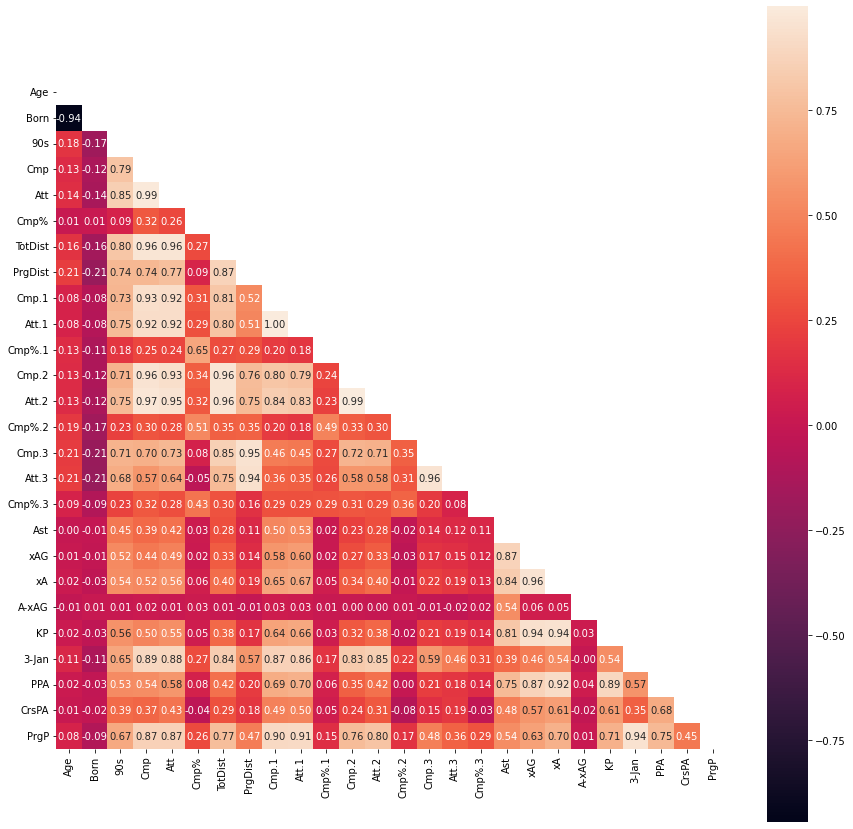

In [86]:
#Just pull numeric data
corr_matrix = passing.select_dtypes('number').corr()

corr_matrix = passing.select_dtypes(include=[np.number]).corr()
# create mask to just show one side of the square
# plot correlation matrix
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
f, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', mask=mask, square=True)

#### After removing highly correlated features and features that repeat in other datasets, we are left with  the following features ('Cmp','Att','TotDist','PrgDist'): 

Cmp= Total Passes Completed

Att = Passes Attempted

CrsPA = Crosses into Penalty Area

We believe these are the most relevant features in determining the passing ability of a player.

In [87]:
possesion22 = pd.read_csv("22poss.csv",encoding='ISO-8859-1',header=1)
possesion21 = pd.read_csv("21poss.csv",encoding='ISO-8859-1',header=1)
possesion20 = pd.read_csv("20poss.csv",encoding='ISO-8859-1',header=1)
possesion19 = pd.read_csv("19poss.csv",encoding='ISO-8859-1',header=1)
possesion18 = pd.read_csv("18poss.csv",encoding='ISO-8859-1',header=1)

possesion = pd.concat([possesion22, possesion21, possesion20, possesion19,possesion18])


possesion.head()

,Player,Nation,Pos,Squad,Age,Born,90s,Touches,Def Pen,Def 3rd,...,TotDist,PrgDist,PrgC,3-Jan,CPA,Mis,Dis,Rec,PrgR,-9999
0,Max Aarons,eng ENG,DF,Norwich City,21,2000,32.0,1841.0,160.0,721.0,...,6454.0,3377.0,78.0,47.0,12.0,38.0,23.0,1030.0,85.0,774cf58b
1,Che Adams,sct SCO,FW,Southampton,25,1996,22.7,712.0,22.0,81.0,...,1804.0,651.0,19.0,13.0,13.0,59.0,34.0,537.0,153.0,f2bf1b0f
2,Rayan Aït Nouri,fr FRA,DFMF,Wolves,20,2001,20.3,1293.0,49.0,459.0,...,3744.0,1969.0,60.0,38.0,19.0,44.0,27.0,736.0,127.0,9b398aea
3,Kristoffer Ajer,no NOR,DF,Brentford,23,1998,22.2,1101.0,108.0,442.0,...,2991.0,1717.0,30.0,25.0,2.0,25.0,7.0,530.0,29.0,a8c0acb7
4,Nathan Aké,nl NED,DF,Manchester City,26,1995,10.3,956.0,56.0,332.0,...,3333.0,2158.0,12.0,12.0,0.0,4.0,3.0,741.0,8.0,eaeca114


In [88]:
pd.set_option('display.max_row', None)
# calculate the number and pct of missing values for each variable
num_missing = missing_statistics(possesion)
num_missing




,num_missing,pct_missing
Tkld%,392,15.0
Succ%,392,15.0
Succ,2,0.0
PrgC,2,0.0
TotDist,2,0.0
Carries,2,0.0
Tkld,2,0.0
3-Jan,2,0.0
Att,2,0.0
Live,2,0.0


In [89]:
# replace null values with 0
possesion = possesion.fillna(0)
#possesion.to_csv("possesioncombined.csv",index=False)


C:\Users\Bimal\AppData\Local\Temp/ipykernel_3816/3354498945.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_matrix, dtype=np.bool)


<AxesSubplot:>

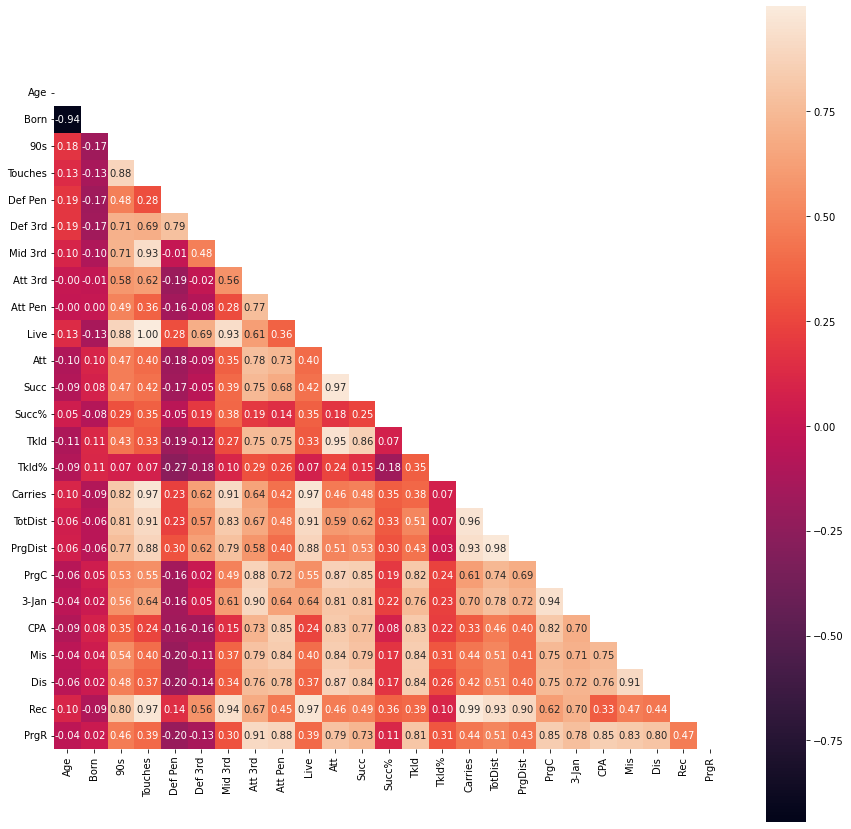

In [90]:
corr_matrix = possesion.select_dtypes('number').corr()

corr_matrix = possesion.select_dtypes(include=[np.number]).corr()
# create mask to just show one side of the square
# plot correlation matrix
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
f, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', mask=mask, square=True)

#### After removing highly correlated features and features that repeat in other datasets, we are left with  the following features ('Att','Succ','TotDist','PrgDist'): 

Att = Number of attempts to take on defenders while dribbling

TotDist = Total Carrying Distance

Def 3rd = Touches in defensive 1/3

Mid 3rd = Touches in middle 1/3




We believe these are the most relevant features in determining the players ability to keep possesion.

In [91]:
shooting22 = pd.read_csv("22shooting.csv",encoding='ISO-8859-1',header=1)
shooting21 = pd.read_csv("21shooting.csv",encoding='ISO-8859-1',header=1)
shooting20 = pd.read_csv("20shooting.csv",encoding='ISO-8859-1',header=1)
shooting19 = pd.read_csv("19shooting.csv",encoding='ISO-8859-1',header=1)
shooting18 = pd.read_csv("18shooting.csv",encoding='ISO-8859-1',header=1)

shooting = pd.concat([shooting22, shooting21, shooting20, shooting19,shooting18])


shooting.head()


,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,SoT,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,-9999
0,Max Aarons,eng ENG,DF,Norwich City,21,2000,32.0,0,13.0,2,...,19.9,0.0,0,0,0.8,0.8,0.06,-0.8,-0.8,774cf58b
1,Che Adams,sct SCO,FW,Southampton,25,1996,22.7,7,49.0,24,...,13.3,0.0,0,0,7.1,7.1,0.15,-0.1,-0.1,f2bf1b0f
2,Rayan Aït Nouri,fr FRA,DFMF,Wolves,20,2001,20.3,1,13.0,4,...,17.6,0.0,0,0,0.6,0.6,0.04,0.4,0.4,9b398aea
3,Kristoffer Ajer,no NOR,DF,Brentford,23,1998,22.2,1,7.0,1,...,8.8,0.0,0,0,0.8,0.8,0.11,0.2,0.2,a8c0acb7
4,Nathan Aké,nl NED,DF,Manchester City,26,1995,10.3,2,5.0,2,...,7.3,0.0,0,0,0.7,0.7,0.13,1.3,1.3,eaeca114


In [92]:
pd.set_option('display.max_row', None)
# calculate the number and pct of missing values for each variable
num_missing = missing_statistics(shooting)
num_missing




,num_missing,pct_missing
G/SoT,752,29.0
Dist,440,17.0
npxG/Sh,440,17.0
SoT%,440,17.0
G/Sh,440,17.0
np:G-xG,2,0.0
G-xG,2,0.0
npxG,2,0.0
xG,2,0.0
FK,2,0.0


In [93]:
# replace null values with 0
shooting = shooting.fillna(0)
#shooting.to_csv("shootingcombined.csv",index=False)


C:\Users\Bimal\AppData\Local\Temp/ipykernel_3816/3457980013.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_matrix, dtype=np.bool)


<AxesSubplot:>

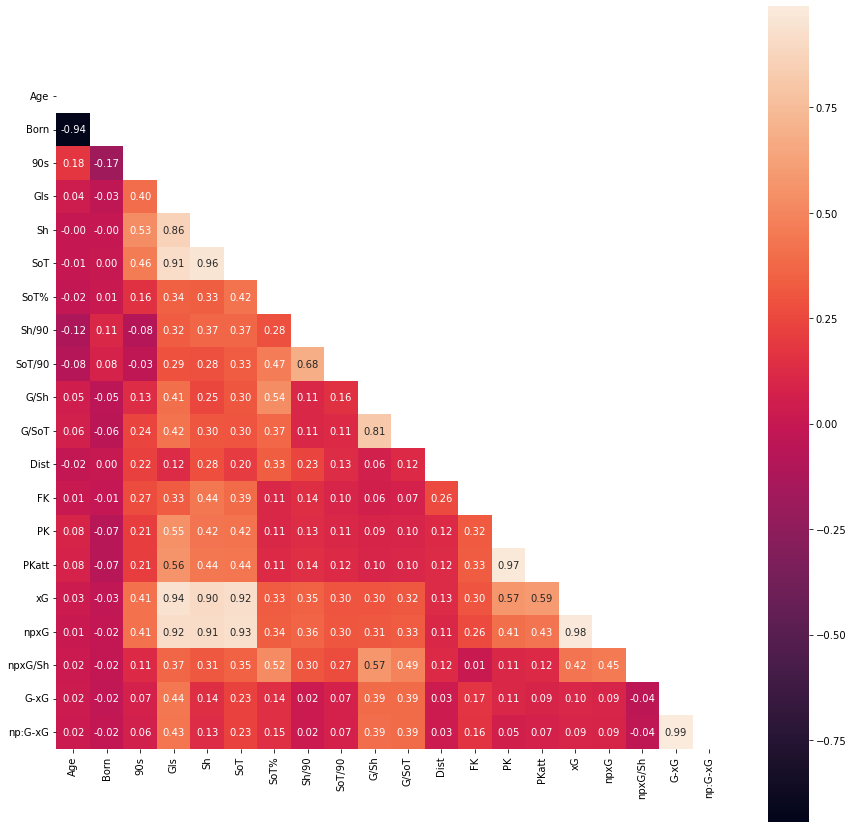

In [94]:
#Just pull numeric data
corr_matrix = shooting.select_dtypes('number').corr()

corr_matrix = shooting.select_dtypes(include=[np.number]).corr()
# create mask to just show one side of the square
# plot correlation matrix
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
f, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', mask=mask, square=True)

#### After removing highly correlated features and features that repeat in other datasets, we are left with  the following features ('Sh','SoT','FK','PK'): 

Sh = Shots Total

FK = Shots from free kicks

PK = Penalty Kicks Made

SoT/90= Shots on target per 90 minutes

We believe these are the most relevant features in determining the shooting ability of a player.

In [95]:
standard22 = pd.read_csv("22standard.csv",encoding='ISO-8859-1',header=1)
standard21 = pd.read_csv("21standard.csv",encoding='ISO-8859-1',header=1)
standard20 = pd.read_csv("20standard.csv",encoding='ISO-8859-1',header=1)
standard19 = pd.read_csv("19standard.csv",encoding='ISO-8859-1',header=1)
standard18 = pd.read_csv("18standard.csv",encoding='ISO-8859-1',header=1)

standard = pd.concat([standard22, standard21, standard20, standard19,standard18])


standard.head()


,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,90s,...,Ast.1,G+A.1,G-PK.1,G+A-PK,xG.1,xAG.1,xG+xAG,npxG.1,npxG+xAG.1,-9999
0,Max Aarons,eng ENG,DF,Norwich City,21,2000,34,32,2881,32.0,...,0.06,0.06,0.00,0.06,0.03,0.05,0.08,0.03,0.08,774cf58b
1,Che Adams,sct SCO,FW,Southampton,25,1996,30,23,2039,22.7,...,0.13,0.44,0.31,0.44,0.31,0.13,0.45,0.31,0.45,f2bf1b0f
2,Rayan Aït Nouri,fr FRA,DFMF,Wolves,20,2001,23,20,1828,20.3,...,0.10,0.15,0.05,0.15,0.03,0.08,0.11,0.03,0.11,9b398aea
3,Kristoffer Ajer,no NOR,DF,Brentford,23,1998,24,23,1995,22.2,...,0.14,0.18,0.05,0.18,0.04,0.08,0.11,0.04,0.11,a8c0acb7
4,Nathan Aké,nl NED,DF,Manchester City,26,1995,14,10,923,10.3,...,0.00,0.20,0.20,0.20,0.07,0.06,0.12,0.07,0.12,eaeca114


In [96]:
pd.set_option('display.max_row', None)
# calculate the number and pct of missing values for each variable
num_missing = missing_statistics(standard)
num_missing


,num_missing,pct_missing
npxG+xAG.1,3,0.0
npxG.1,3,0.0
xG+xAG,3,0.0
xAG.1,3,0.0
xG.1,3,0.0
xG,2,0.0
PrgR,2,0.0
xAG,2,0.0
npxG+xAG,2,0.0
PrgC,2,0.0


In [97]:
# replace null values with 0
standard = standard.fillna(0)
standard.to_csv("standardcombined.csv",index=False)


C:\Users\Bimal\AppData\Local\Temp/ipykernel_3816/3603825763.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_matrix, dtype=np.bool)


<AxesSubplot:>

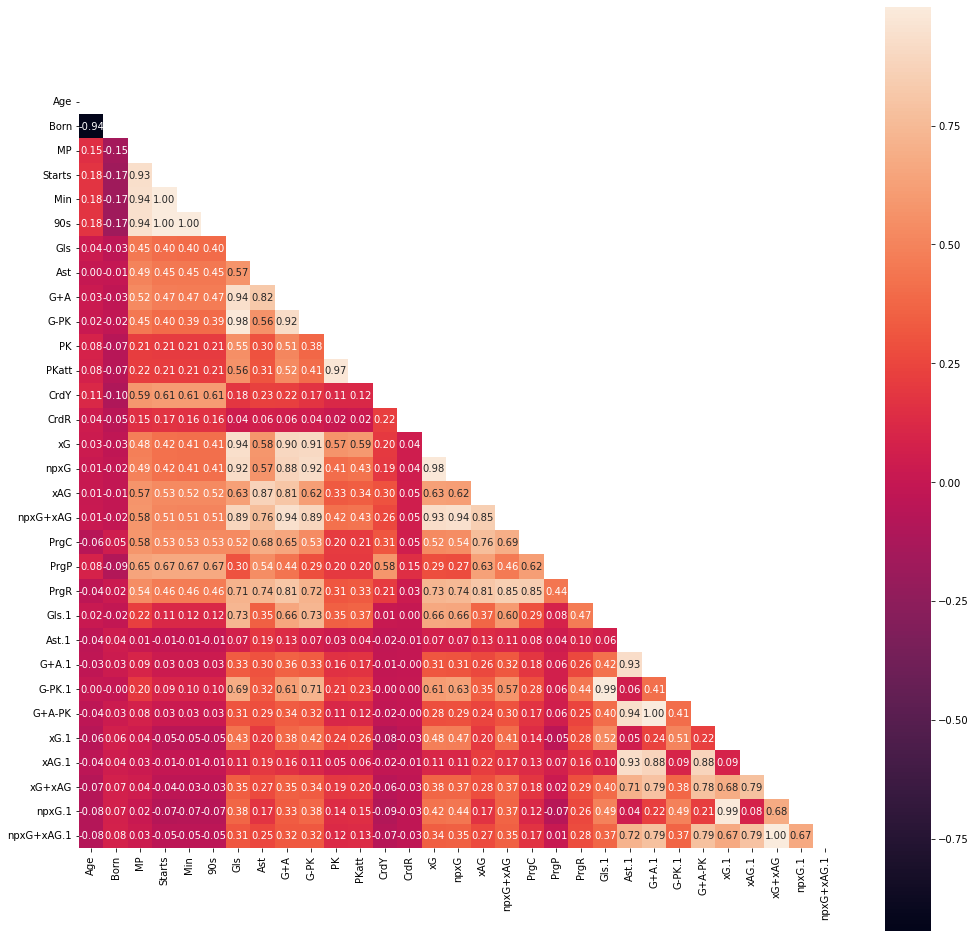

In [98]:
#Just pull numeric data
corr_matrix = standard.select_dtypes('number').corr()

corr_matrix = standard.select_dtypes(include=[np.number]).corr()
# create mask to just show one side of the square
# plot correlation matrix
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
f, ax = plt.subplots(figsize=(17,17))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', mask=mask, square=True)


#### Standard File has too many features that are similar/identical to the previous files;hence, we won't be using any features from this dataframe

In [99]:
misc22 = pd.read_csv("22misc.csv",encoding='ISO-8859-1',header=1)
misc21 = pd.read_csv("21misc.csv",encoding='ISO-8859-1',header=1)
misc20 = pd.read_csv("20misc.csv",encoding='ISO-8859-1',header=1)
misc19 = pd.read_csv("19misc.csv",encoding='ISO-8859-1',header=1)
misc18 = pd.read_csv("18misc.csv",encoding='ISO-8859-1',header=1)

misc = pd.concat([misc22, misc21, misc20, misc19,misc18])


misc.head()

,Player,Nation,Pos,Squad,Age,Born,90s,CrdY,CrdR,2CrdY,...,Int,TklW,PKwon,PKcon,OG,Recov,Won,Lost,Won%,-9999
0,Max Aarons,eng ENG,DF,Norwich City,21,2000,32.0,8,0,0.0,...,28.0,44.0,0.0,2.0,1.0,154.0,13.0,50.0,20.6,774cf58b
1,Che Adams,sct SCO,FW,Southampton,25,1996,22.7,0,0,0.0,...,8.0,6.0,0.0,0.0,0.0,70.0,61.0,91.0,40.1,f2bf1b0f
2,Rayan Aït Nouri,fr FRA,DFMF,Wolves,20,2001,20.3,4,0,0.0,...,22.0,36.0,1.0,0.0,0.0,128.0,17.0,13.0,56.7,9b398aea
3,Kristoffer Ajer,no NOR,DF,Brentford,23,1998,22.2,5,0,0.0,...,26.0,18.0,0.0,0.0,0.0,109.0,49.0,31.0,61.3,a8c0acb7
4,Nathan Aké,nl NED,DF,Manchester City,26,1995,10.3,0,0,0.0,...,8.0,9.0,0.0,0.0,0.0,43.0,37.0,12.0,75.5,eaeca114


In [100]:
pd.set_option('display.max_row', None)
# calculate the number and pct of missing values for each variable
num_missing = missing_statistics(misc)
num_missing




,num_missing,pct_missing
Won%,158,6.0
Lost,2,0.0
Won,2,0.0
Recov,2,0.0
PKcon,2,0.0
PKwon,2,0.0
Off,1,0.0
Crs,1,0.0
OG,1,0.0
2CrdY,1,0.0


In [101]:
# replace null values with 0
misc = misc.fillna(0)
#misc.to_csv("misccombined.csv",index=False)


C:\Users\Bimal\AppData\Local\Temp/ipykernel_3816/462202712.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_matrix, dtype=np.bool)


<AxesSubplot:>

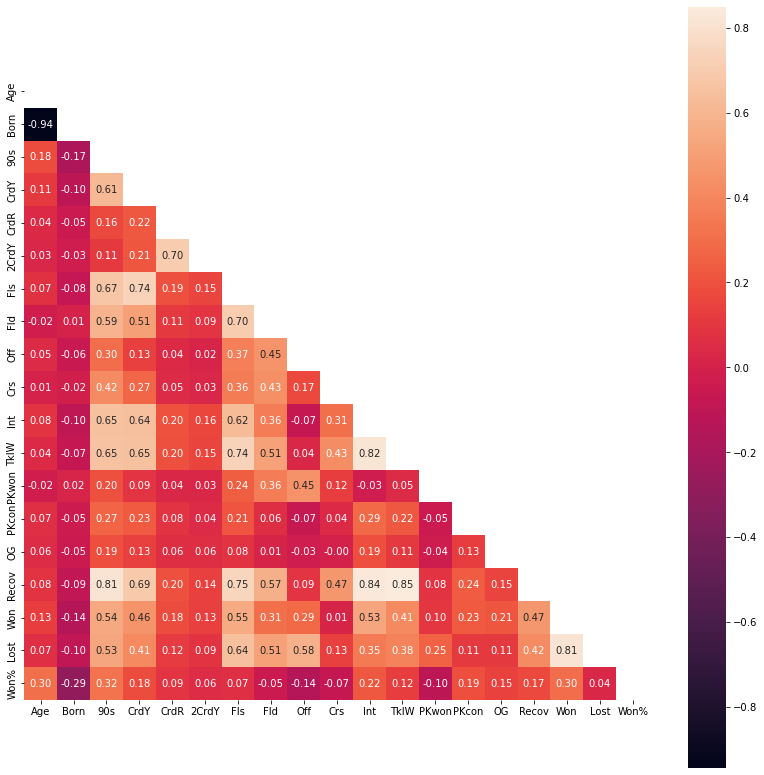

In [102]:
#Just pull numeric data
corr_matrix = misc.select_dtypes('number').corr()

corr_matrix = misc.select_dtypes(include=[np.number]).corr()
# create mask to just show one side of the square
# plot correlation matrix
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
f, ax = plt.subplots(figsize=(14,14))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', mask=mask, square=True)


#### After removing highly correlated features and features that repeat in other datasets, we are left with  the following features: 

Recov = Number of loose balls recovered

Won = Aerials won

Int = Interceptions


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import distance_metrics

### Creating dataset with only features above

In [2]:
years = ['22','21','20','19','18']
stats = ['wages','standard','shooting','passing','gsc','defend','poss','misc']

In [3]:
wages_tags = []
wages_df = {}
for year in years:
    wages_tags.append(year+stats[0])
for tag in wages_tags:
    wages_df[tag] = pd.DataFrame()

In [4]:
for i in range(len(wages_df)):
    wages_df[i] = pd.read_csv(f'{wages_tags[i]}.csv',encoding='ISO-8859-1')
    wages_df[i] = wages_df[i].rename(columns={"Player-additional": "PlayerID"})
    wages_df[i] = wages_df[i][['Player','Age','Pos','Annual Wages','PlayerID']]
    wages_df[i]['Annual Wages'] = wages_df[i]['Annual Wages'].str.split('$').str[1]
    wages_df[i]['Annual Wages'] = wages_df[i]['Annual Wages'].str.replace(')','').astype(int)
    wages_df[i]['Pos1'] = wages_df[i]['Pos'].str.slice(stop=2)
    wages_df[i]['Pos2'] = wages_df[i]['Pos'].str.slice(start=2)
    wages_df[i]['Player'] = wages_df[i]['Player'] + f' {years[i]}'
    wages_df[i]['PlayerID'] = wages_df[i]['PlayerID'] + f'-{years[i]}'

C:\Users\Bimal\AppData\Local\Temp/ipykernel_3816/1199662294.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  wages_df[i]['Annual Wages'] = wages_df[i]['Annual Wages'].str.replace(')','').astype(int)


In [5]:
wages_df_train = pd.concat([wages_df[1],wages_df[2],wages_df[3],wages_df[4]])
wages_df_new = wages_df[0]
wages_df_train

,Player,Age,Pos,Annual Wages,PlayerID,Pos1,Pos2
0,Gareth Bale 21,31,FW,37914901,a58bb1e1-21,FW,
1,Kevin De Bruyne 21,29,MFFW,25276601,e46012d4-21,MF,FW
2,David de Gea 21,29,GK,23696813,7ba6d84e-21,GK,
3,Mesut Özil 21,32,NaN,22117026,16380240-21,NaN,NaN
4,Raheem Sterling 21,25,FW,18957451,b400bde0-21,FW,
...,...,...,...,...,...,...,...
558,Fraser Hornby 18,17,FW,6076,29aee77c-18,FW,
559,Michael Collins 18,16,NaN,6076,f2c6376e-18,NaN,NaN
560,Morgan Feeney 18,18,DF,6076,7abbf224-18,DF,
561,Shayne Lavery 18,18,NaN,6076,d333ffb9-18,NaN,NaN


In [6]:
shooting_tags = []
shooting_df = {}
for year in years:
    shooting_tags.append(year+stats[2])
for tag in shooting_tags:
    shooting_df[tag] = pd.DataFrame()

In [7]:
for i in range(len(shooting_df)):
    shooting_df[i] = pd.read_csv(f'{shooting_tags[i]}.csv',encoding='ISO-8859-1')
    shooting_df[i] = shooting_df[i].iloc[:,[8,9,24]]
    new_header = shooting_df[i].iloc[0]
    shooting_df[i] = shooting_df[i][1:]
    shooting_df[i].columns = new_header
    shooting_df[i] = shooting_df[i].rename(columns={"-9999": "PlayerID"})
    shooting_df[i]['PlayerID'] = shooting_df[i]['PlayerID'] + f'-{years[i]}'
    shooting_df[i][['Sh','SoT']] = shooting_df[i][['Sh','SoT']].astype(float)
    shooting_df[i]['SoT'] = shooting_df[i]['SoT'] / 90
    shooting_df[i] = shooting_df[i].groupby(by=['PlayerID']).sum()

In [8]:
shooting_df_train = pd.concat([shooting_df[1],shooting_df[2],shooting_df[3],shooting_df[4]])
shooting_df_new = shooting_df[0]
shooting_df_train

,Sh,SoT
PlayerID,,
00f0482f-21,0.0,0.000000
012c975a-21,7.0,0.000000
02b29014-21,18.0,0.055556
0313a347-21,22.0,0.077778
03edb878-21,4.0,0.022222
...,...,...
fdd85f94-18,36.0,0.055556
fe012aca-18,0.0,0.000000
ff527768-18,13.0,0.044444


In [9]:
passing_tags = []
passing_df = {}
for year in years:
    passing_tags.append(year+stats[3])
for tag in passing_tags:
    passing_df[tag] = pd.DataFrame()

In [10]:
for i in range(len(passing_df)):
    passing_df[i] = pd.read_csv(f'{passing_tags[i]}.csv',encoding='ISO-8859-1')
    passing_df[i] = passing_df[i].iloc[:,[7,8,28,30]]
    new_header = passing_df[i].iloc[0]
    passing_df[i] = passing_df[i][1:]
    passing_df[i].columns = new_header
    passing_df[i] = passing_df[i].rename(columns={"-9999": "PlayerID"})
    passing_df[i]['PlayerID'] = passing_df[i]['PlayerID'] + f'-{years[i]}'
    passing_df[i][['Cmp','Att','CrsPA']] = passing_df[i][['Cmp','Att','CrsPA']].astype(float)
    passing_df[i] = passing_df[i].groupby(by=['PlayerID']).sum()

In [11]:
passing_df_train = pd.concat([passing_df[1],passing_df[2],passing_df[3],passing_df[4]])
passing_df_new = passing_df[0]
passing_df_train

,Cmp,Att,CrsPA
PlayerID,,,
00f0482f-21,5.0,6.0,0.0
012c975a-21,440.0,504.0,0.0
02b29014-21,1141.0,1354.0,1.0
0313a347-21,1102.0,1305.0,0.0
03edb878-21,24.0,36.0,0.0
...,...,...,...
fdd85f94-18,1088.0,1405.0,3.0
fe012aca-18,4.0,4.0,0.0
ff527768-18,1127.0,1367.0,4.0


In [12]:
gsc_tags = []
gsc_df = {}
for year in years:
    gsc_tags.append(year+stats[4])
for tag in gsc_tags:
    gsc_df[tag] = pd.DataFrame()

In [13]:
for i in range(len(gsc_df)):
    gsc_df[i] = pd.read_csv(f'{gsc_tags[i]}.csv',encoding='ISO-8859-1')
    gsc_df[i] = gsc_df[i].iloc[:,[11,12,15,23]]
    new_header = gsc_df[i].iloc[0]
    gsc_df[i] = gsc_df[i][1:]
    gsc_df[i].columns = new_header
    gsc_df[i] = gsc_df[i].rename(columns={"-9999": "PlayerID"})
    gsc_df[i]['PlayerID'] = gsc_df[i]['PlayerID'] + f'-{years[i]}'
    gsc_df[i][['TO','Sh','GCA']] = gsc_df[i][['TO','Sh','GCA']].astype(float)
    gsc_df[i] = gsc_df[i].groupby(by=['PlayerID']).sum()

In [14]:
gsc_df_train = pd.concat([gsc_df[1],gsc_df[2],gsc_df[3],gsc_df[4]])
gsc_df_new = gsc_df[0]
gsc_df_train

,TO,Sh,GCA
PlayerID,,,
00f0482f-21,0.0,0.0,0.0
012c975a-21,0.0,1.0,1.0
02b29014-21,2.0,2.0,7.0
0313a347-21,0.0,1.0,0.0
03edb878-21,0.0,1.0,0.0
...,...,...,...
fdd85f94-18,6.0,5.0,7.0
fe012aca-18,0.0,0.0,0.0
ff527768-18,0.0,1.0,1.0


In [15]:
defend_tags = []
defend_df = {}
for year in years:
    defend_tags.append(year+stats[5])
for tag in defend_tags:
    defend_df[tag] = pd.DataFrame()

In [16]:
for i in range(len(defend_df)):
    defend_df[i] = pd.read_csv(f'{defend_tags[i]}.csv',encoding='ISO-8859-1')
    defend_df[i] = defend_df[i].iloc[:,[8,17,22,23]]
    new_header = defend_df[i].iloc[0]
    defend_df[i] = defend_df[i][1:]
    defend_df[i].columns = new_header
    defend_df[i] = defend_df[i].rename(columns={"-9999": "PlayerID"})
    defend_df[i]['PlayerID'] = defend_df[i]['PlayerID'] + f'-{years[i]}'
    defend_df[i][['TklW','Sh','Err']] = defend_df[i][['TklW','Sh','Err']].astype(float)
    defend_df[i] = defend_df[i].groupby(by=['PlayerID']).sum()

In [17]:
defend_df_train = pd.concat([defend_df[1],defend_df[2],defend_df[3],defend_df[4]])
defend_df_new = defend_df[0]
defend_df_train

,TklW,Sh,Err
PlayerID,,,
00f0482f-21,0.0,0.0,0.0
012c975a-21,4.0,3.0,1.0
02b29014-21,32.0,7.0,1.0
0313a347-21,13.0,47.0,1.0
03edb878-21,2.0,1.0,0.0
...,...,...,...
fdd85f94-18,44.0,11.0,2.0
fe012aca-18,0.0,0.0,0.0
ff527768-18,36.0,10.0,1.0


In [18]:
poss_tags = []
poss_df = {}
for year in years:
    poss_tags.append(year+stats[6])
for tag in poss_tags:
    poss_df[tag] = pd.DataFrame()

In [19]:
for i in range(len(poss_df)):
    poss_df[i] = pd.read_csv(f'{poss_tags[i]}.csv',encoding='ISO-8859-1')
    poss_df[i] = poss_df[i].iloc[:,[9,10,20,29]]
    new_header = poss_df[i].iloc[0]
    poss_df[i] = poss_df[i][1:]
    poss_df[i].columns = new_header
    poss_df[i] = poss_df[i].rename(columns={"-9999": "PlayerID"})
    poss_df[i]['PlayerID'] = poss_df[i]['PlayerID'] + f'-{years[i]}'
    poss_df[i][['Def 3rd','Mid 3rd','TotDist']] = poss_df[i][['Def 3rd','Mid 3rd','TotDist']].astype(float)
    poss_df[i] = poss_df[i].groupby(by=['PlayerID']).sum()

In [20]:
poss_df_train = pd.concat([poss_df[1],poss_df[2],poss_df[3],poss_df[4]])
poss_df_new = poss_df[0]
poss_df_train

,Def 3rd,Mid 3rd,TotDist
PlayerID,,,
00f0482f-21,1.0,6.0,26.0
012c975a-21,264.0,279.0,1311.0
02b29014-21,423.0,881.0,4317.0
0313a347-21,961.0,631.0,2982.0
03edb878-21,8.0,31.0,137.0
...,...,...,...
fdd85f94-18,414.0,1154.0,4348.0
fe012aca-18,0.0,2.0,7.0
ff527768-18,334.0,1059.0,4107.0


In [21]:
misc_tags = []
misc_df = {}
for year in years:
    misc_tags.append(year+stats[7])
for tag in misc_tags:
    misc_df[tag] = pd.DataFrame()

In [22]:
for i in range(len(misc_df)):
    misc_df[i] = pd.read_csv(f'{misc_tags[i]}.csv',encoding='ISO-8859-1')
    misc_df[i] = misc_df[i].iloc[:,[14,19,20,23]]
    new_header = misc_df[i].iloc[0]
    misc_df[i] = misc_df[i][1:]
    misc_df[i].columns = new_header
    misc_df[i] = misc_df[i].rename(columns={"-9999": "PlayerID"})
    misc_df[i]['PlayerID'] = misc_df[i]['PlayerID'] + f'-{years[i]}'
    misc_df[i][['Int','Recov','Won']] = misc_df[i][['Int','Recov','Won']].astype(float)
    misc_df[i] = misc_df[i].groupby(by=['PlayerID']).sum()

In [23]:
misc_df_train = pd.concat([misc_df[1],misc_df[2],misc_df[3],misc_df[4]])
misc_df_new = misc_df[0]
misc_df_train

,Int,Recov,Won
PlayerID,,,
00f0482f-21,0.0,1.0,1.0
012c975a-21,6.0,34.0,30.0
02b29014-21,39.0,186.0,38.0
0313a347-21,29.0,156.0,93.0
03edb878-21,1.0,15.0,5.0
...,...,...,...
fdd85f94-18,60.0,245.0,46.0
fe012aca-18,0.0,0.0,0.0
ff527768-18,47.0,222.0,10.0


In [24]:
merged_df_train = wages_df_train.drop(columns=['Pos','Pos2'])
merged_df_train = merged_df_train.merge(shooting_df_train, on='PlayerID')
merged_df_train = merged_df_train.merge(passing_df_train, on='PlayerID')
merged_df_train = merged_df_train.merge(gsc_df_train, on='PlayerID')
merged_df_train = merged_df_train.merge(defend_df_train, on='PlayerID')
merged_df_train = merged_df_train.merge(poss_df_train, on='PlayerID')
merged_df_train = merged_df_train.merge(misc_df_train, on='PlayerID')

merged_df_train

,Player,Age,Annual Wages,PlayerID,Pos1,Sh_x,SoT,Cmp,Att,CrsPA,...,GCA,TklW,Sh,Err,Def 3rd,Mid 3rd,TotDist,Int,Recov,Won
0,Gareth Bale 21,31,37914901,a58bb1e1-21,FW,38.0,0.211111,285.0,416.0,3.0,...,6.0,10.0,2.0,0.0,79.0,251.0,2345.0,8.0,38.0,23.0
1,Kevin De Bruyne 21,29,25276601,e46012d4-21,MF,77.0,0.266667,1078.0,1429.0,10.0,...,18.0,21.0,1.0,0.0,105.0,715.0,5855.0,9.0,116.0,4.0
2,David de Gea 21,29,23696813,7ba6d84e-21,GK,0.0,0.000000,464.0,592.0,0.0,...,1.0,0.0,0.0,3.0,638.0,1.0,1437.0,0.0,32.0,4.0
3,Raheem Sterling 21,25,18957451,b400bde0-21,FW,69.0,0.311111,966.0,1141.0,1.0,...,15.0,10.0,0.0,0.0,65.0,568.0,6339.0,15.0,99.0,9.0
4,Paul Pogba 21,27,18325536,867239d3-21,MF,31.0,0.122222,1112.0,1367.0,1.0,...,7.0,26.0,2.0,0.0,324.0,885.0,4978.0,26.0,148.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1922,Levi Lumeka 18,18,31596,199ff86e-18,FW,1.0,0.000000,5.0,11.0,0.0,...,0.0,1.0,0.0,0.0,2.0,7.0,87.0,1.0,2.0,0.0
1923,Tyrese Campbell 18,17,6076,38aefb74-18,FW,2.0,0.011111,10.0,20.0,0.0,...,0.0,1.0,1.0,0.0,2.0,9.0,41.0,1.0,1.0,2.0
1924,Michael Obafemi 18,17,6076,caa1a7f0-18,FW,1.0,0.000000,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
1925,Callum Hudson-Odoi 18,16,6076,15f3ec41-18,NaN,2.0,0.011111,12.0,18.0,0.0,...,0.0,0.0,0.0,0.0,0.0,13.0,199.0,0.0,0.0,0.0


In [25]:
merged_df_new = wages_df_new.drop(columns=['Pos','Pos2'])
merged_df_new = merged_df_new.merge(shooting_df_new, on='PlayerID')
merged_df_new = merged_df_new.merge(passing_df_new, on='PlayerID')
merged_df_new = merged_df_new.merge(gsc_df_new, on='PlayerID')
merged_df_new = merged_df_new.merge(defend_df_new, on='PlayerID')
merged_df_new = merged_df_new.merge(poss_df_new, on='PlayerID')
merged_df_new = merged_df_new.merge(misc_df_new, on='PlayerID')

merged_df_new

,Player,Age,Annual Wages,PlayerID,Pos1,Sh_x,SoT,Cmp,Att,CrsPA,...,GCA,TklW,Sh,Err,Def 3rd,Mid 3rd,TotDist,Int,Recov,Won
0,Cristiano Ronaldo 22,36,32567928,dea698d9-22,FW,107.0,0.433333,726.0,904.0,0.0,...,9.0,6.0,0.0,0.0,102.0,500.0,3252.0,2.0,52.0,42.0
1,Kevin De Bruyne 22,30,25276601,e46012d4-22,MF,78.0,0.344444,1170.0,1568.0,10.0,...,14.0,16.0,2.0,0.0,127.0,685.0,5397.0,6.0,114.0,11.0
2,David de Gea 22,30,23696813,7ba6d84e-22,GK,0.0,0.000000,677.0,924.0,0.0,...,0.0,0.0,0.0,2.0,1019.0,1.0,2450.0,0.0,30.0,8.0
3,Jadon Sancho 22,21,22117026,dbf053da-22,FW,26.0,0.100000,805.0,984.0,7.0,...,9.0,8.0,0.0,3.0,146.0,451.0,5515.0,15.0,112.0,2.0
4,Raphaël Varane 22,28,21485111,9f8e9423-22,DF,9.0,0.011111,1014.0,1156.0,0.0,...,2.0,19.0,9.0,1.0,645.0,659.0,4704.0,18.0,78.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,Jamie Shackleton 22,21,97218,8d03ca5a-22,DF,4.0,0.011111,353.0,409.0,0.0,...,1.0,16.0,7.0,1.0,190.0,225.0,1329.0,8.0,50.0,5.0
492,Carney Chukwuemeka 22,17,97218,b2f9c73e-22,MF,4.0,0.011111,98.0,121.0,0.0,...,2.0,1.0,0.0,1.0,22.0,89.0,710.0,1.0,16.0,7.0
493,Sam Greenwood 22,19,85065,f3354c07-22,MF,4.0,0.000000,54.0,80.0,0.0,...,1.0,5.0,0.0,0.0,14.0,61.0,252.0,2.0,14.0,2.0
494,Sean Longstaff 22,23,60761,a2b105e0-22,MF,15.0,0.022222,481.0,604.0,0.0,...,3.0,34.0,6.0,0.0,201.0,439.0,1366.0,9.0,95.0,13.0


In [26]:
merged_df = merged_df_train.append(merged_df_new)
merged_df
#merged_df.to_csv('EDA.csv', index=False)


,Player,Age,Annual Wages,PlayerID,Pos1,Sh_x,SoT,Cmp,Att,CrsPA,...,GCA,TklW,Sh,Err,Def 3rd,Mid 3rd,TotDist,Int,Recov,Won
0,Gareth Bale 21,31,37914901,a58bb1e1-21,FW,38.0,0.211111,285.0,416.0,3.0,...,6.0,10.0,2.0,0.0,79.0,251.0,2345.0,8.0,38.0,23.0
1,Kevin De Bruyne 21,29,25276601,e46012d4-21,MF,77.0,0.266667,1078.0,1429.0,10.0,...,18.0,21.0,1.0,0.0,105.0,715.0,5855.0,9.0,116.0,4.0
2,David de Gea 21,29,23696813,7ba6d84e-21,GK,0.0,0.000000,464.0,592.0,0.0,...,1.0,0.0,0.0,3.0,638.0,1.0,1437.0,0.0,32.0,4.0
3,Raheem Sterling 21,25,18957451,b400bde0-21,FW,69.0,0.311111,966.0,1141.0,1.0,...,15.0,10.0,0.0,0.0,65.0,568.0,6339.0,15.0,99.0,9.0
4,Paul Pogba 21,27,18325536,867239d3-21,MF,31.0,0.122222,1112.0,1367.0,1.0,...,7.0,26.0,2.0,0.0,324.0,885.0,4978.0,26.0,148.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,Jamie Shackleton 22,21,97218,8d03ca5a-22,DF,4.0,0.011111,353.0,409.0,0.0,...,1.0,16.0,7.0,1.0,190.0,225.0,1329.0,8.0,50.0,5.0
492,Carney Chukwuemeka 22,17,97218,b2f9c73e-22,MF,4.0,0.011111,98.0,121.0,0.0,...,2.0,1.0,0.0,1.0,22.0,89.0,710.0,1.0,16.0,7.0
493,Sam Greenwood 22,19,85065,f3354c07-22,MF,4.0,0.000000,54.0,80.0,0.0,...,1.0,5.0,0.0,0.0,14.0,61.0,252.0,2.0,14.0,2.0
494,Sean Longstaff 22,23,60761,a2b105e0-22,MF,15.0,0.022222,481.0,604.0,0.0,...,3.0,34.0,6.0,0.0,201.0,439.0,1366.0,9.0,95.0,13.0


### Data Visualizations

In [103]:
EDA=merged_df

In [104]:
EDA.dtypes

Player           object
Age               int64
Annual Wages      int32
PlayerID         object
Pos1             object
Sh_x            float64
SoT             float64
Cmp             float64
Att             float64
CrsPA           float64
TO              float64
Sh_y            float64
GCA             float64
TklW            float64
Sh              float64
Err             float64
Def 3rd         float64
Mid 3rd         float64
TotDist         float64
Int             float64
Recov           float64
Won             float64
dtype: object

#### Managers would want to find players with lower wages and high goal threat

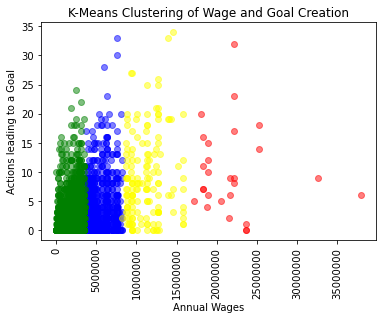

In [107]:
from sklearn.cluster import KMeans

# drop the 'Player' and 'PlayerID' columns
data = EDA.drop(columns=['Player', 'PlayerID','Pos1'])

# apply k-means clustering with 4 clusters
#The KMeans algorithm works by dividing a set of data points into a specified number 
#of clusters (here, n_clusters=4) based on their similarity--euclidean distance
kmeans = KMeans(n_clusters=4, random_state=0).fit(data)

# add the cluster labels to the original dataframe
EDA['cluster'] = kmeans.labels_

# plot the clusters
colors = ['blue', 'green', 'red','yellow']
for i in range(len(colors)):
    x = data[EDA['cluster']==i]['Annual Wages']
    y = data[EDA['cluster']==i]['GCA']
    plt.scatter(x, y, c=colors[i], alpha=0.5)
plt.xlabel('Annual Wages')
plt.ylabel('Actions leading to a Goal')
plt.title('K-Means Clustering of Wage and Goal Creation')
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=90)
plt.show()

#### Most players are not good tacklers 

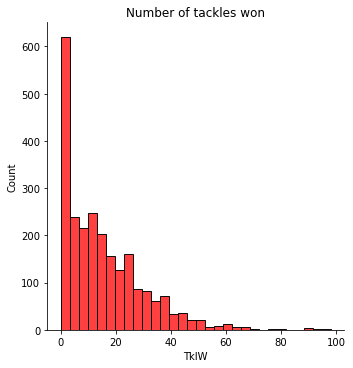

In [109]:
sns.displot(EDA['TklW'], kde = False, color ='red', bins = 30)

# Set the title of the plot
plt.title('Number of tackles won')

# Show the plot
plt.show()


#### Median number of passes is 500 but there seems to be quite a few outliers who are the world class midfielders

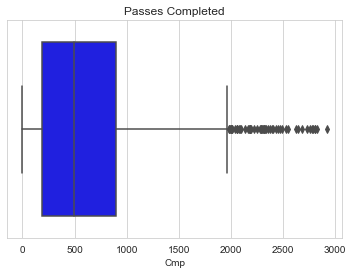

In [110]:
sns.set_style('whitegrid')



# Create the boxplot based on the same 'Tkl' column
sns.boxplot(x=EDA['Cmp'], color='blue')

# Set the title of the plot
plt.title('Passes Completed')

# Show the plot
plt.show()

#### Players that can defend and attack are a manager's dream, but rare

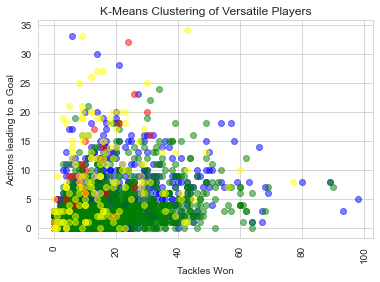

In [112]:
# drop the 'Player' and 'PlayerID' columns
data = EDA.drop(columns=['Player', 'PlayerID','Pos1'])

# apply k-means clustering with 4 clusters
#The KMeans algorithm works by dividing a set of data points into a specified number 
#of clusters (here, n_clusters=4) based on their similarity--euclidean distance
kmeans = KMeans(n_clusters=4, random_state=0).fit(data)

# add the cluster labels to the original dataframe
EDA['cluster'] = kmeans.labels_

# plot the clusters
colors = ['blue', 'green', 'red','yellow']
for i in range(len(colors)):
    x = data[EDA['cluster']==i]['TklW']
    y = data[EDA['cluster']==i]['GCA']
    plt.scatter(x, y, c=colors[i], alpha=0.5)
plt.xlabel('Tackles Won')
plt.ylabel('Actions leading to a Goal')
plt.title('K-Means Clustering of Versatile Players')
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=90)
plt.show()


### Creating similarity matrix to artifically create similar players for train and test

In [27]:
# Create dataframes for similarity measure
player_data_train = merged_df_train.fillna(0)
player_data_train = player_data_train.drop(columns = ['Age','Annual Wages','PlayerID','Pos1'])
player_data_train.set_index('Player', inplace=True)

player_data_new = merged_df_new.fillna(0)
player_data_new = player_data_new.drop(columns = ['Age','Annual Wages','PlayerID','Pos1'])
player_data_new.set_index('Player', inplace=True)

In [ ]:
# compute the cosine similarity matrix for all pairs of players
cosine_matrix = cosine_similarity(player_data_train, player_data_new)

# for each player, get the indices of the two most similar players
most_similar_cosine = []
for i in range(len(player_data_train)):
    # sort the cosine similarity values for player i in descending order
    sorted_indices_cosine = cosine_matrix[i].argsort()[::-1]
    # get the indices of the two most similar players (excluding player i itself)
    most_similar_indices_c = sorted_indices_cosine[:5]
    most_similar_cosine.append(most_similar_indices_c)

similar_players_c = []
# print the results
for i, similar_indices_cosine in enumerate(most_similar_cosine):
    player_name_c = player_data_train.index[i]
    similar_player_names_c = [player_data_new.index[idx] for idx in similar_indices_cosine]
    similar_players_c.append(similar_player_names_c)
    #print(f"{player_name_c}'s most similar players are: {similar_player_names_c}")

In [116]:
#One example of the top 5 similar players
print(f"{player_name_m}'s most similar players are: {similar_player_names_m[:5]}")


Ethan Ampadu 18's most similar players are: ['Tariqe Fosu 22', 'Trézéguet 22', 'Dwight Gayle 22', 'Kristoffer Klaesson 22', 'Bali Mumba 22']


In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

# compute the euclidean distance matrix for all pairs of players

euclidean_matrix = euclidean_distances(player_data_train, player_data_new)
# for each player, get the indices of the two most similar players
most_similar_euclidean = []
for i in range(len(player_data_train)):
    # sort the euclidean distance values for player i in ascending order
    sorted_indices_euclidean = euclidean_matrix[i].argsort()
    # get the indices of the two most similar players (excluding player i itself)
    most_similar_indices_euclidean = sorted_indices_euclidean[:5]
    most_similar_euclidean.append(most_similar_indices_euclidean)

similar_players_e = []
# print the results
for i, similar_indices_euclidean in enumerate(most_similar_euclidean):
    player_name_e = player_data_train.index[i]
    similar_player_names_e = [player_data_new.index[idx] for idx in similar_indices_euclidean]
    similar_players_e.append(similar_player_names_e)
    #print(f"{player_name_e}'s most similar players are: {similar_player_names_e}")

In [117]:
#One example of the top 5 similar players
print(f"{player_name_e}'s most similar players are: {similar_player_names_e[:5]}")

Ethan Ampadu 18's most similar players are: ['Tariqe Fosu 22', 'Trézéguet 22', 'Ashley Fletcher 22', 'Kristoffer Klaesson 22', 'Bali Mumba 22']


In [ ]:
from sklearn.metrics.pairwise import manhattan_distances

manhattan_matrix = manhattan_distances(player_data_train, player_data_new)
# for each player, get the indices of the two most similar players
most_similar_m = []
for i in range(len(player_data_train)):
    # sort the Manhattan distance values for player i in ascending order
    sorted_indices_m = manhattan_matrix[i].argsort()
    # get the indices of the two most similar players (excluding player i itself)
    most_similar_indices_m = sorted_indices_m[:5]
    most_similar_m.append(most_similar_indices_m)

similar_players_m = []
# print the results
for i, similar_indices_m in enumerate(most_similar_m):
    player_name_m = player_data_train.index[i]
    similar_player_names_m = [player_data_new.index[idx] for idx in similar_indices_m]
    similar_players_m.append(similar_player_names_m)
    #print(f"{player_name_m}'s most similar players are: {similar_player_names_m}")

In [118]:
#One example of the top 5 similar players
print(f"{player_name_m}'s most similar players are: {similar_player_names_m[:5]}")


Ethan Ampadu 18's most similar players are: ['Tariqe Fosu 22', 'Trézéguet 22', 'Dwight Gayle 22', 'Kristoffer Klaesson 22', 'Bali Mumba 22']


In [31]:
player_list_train = player_data_train.index.values
player_list_new = player_data_new.index.values

By defining similar players by the 5 closest to each player,we avoid the cold start problem by ensuring every player has at least 5 "ratings" in the similarity matrix below.

In [32]:
# Create matrix for player similarity
player_similarity_matrix = pd.DataFrame(index = player_list_train, columns = player_list_new)
for i in range(len(player_list_train)):
    for j in range(len(player_list_new)):
        if player_list_new[j] in similar_players_c[i]:
            player_similarity_matrix.iloc[i,j] = 1
        else:
            player_similarity_matrix.iloc[i,j] = 0
        if player_list_new[j] in similar_players_e[i]:
            player_similarity_matrix.iloc[i,j] = player_similarity_matrix.iloc[i,j] + 1
        else:
            player_similarity_matrix.iloc[i,j] = player_similarity_matrix.iloc[i,j] + 0
        if player_list_new[j] in similar_players_m[i]:
            player_similarity_matrix.iloc[i,j] = player_similarity_matrix.iloc[i,j] + 1
        else:
            player_similarity_matrix.iloc[i,j] = player_similarity_matrix.iloc[i,j] + 0
player_similarity_matrix

,Cristiano Ronaldo 22,Kevin De Bruyne 22,David de Gea 22,Jadon Sancho 22,Raphaël Varane 22,Romelu Lukaku 22,Jack Grealish 22,Raheem Sterling 22,Paul Pogba 22,N'Golo Kanté 22,...,Jeremy Ngakia 22,Bali Mumba 22,Charlie Cresswell 22,Yan Valery 22,Jonas Lössl 22,Jamie Shackleton 22,Carney Chukwuemeka 22,Sam Greenwood 22,Sean Longstaff 22,Liam McCarron 22
Gareth Bale 21,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kevin De Bruyne 21,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
David de Gea 21,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Raheem Sterling 21,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Paul Pogba 21,0,0,0,0,0,0,0,0,1,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Levi Lumeka 18,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
Tyrese Campbell 18,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
Michael Obafemi 18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Callum Hudson-Odoi 18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
np.unique(player_similarity_matrix.values, return_counts=True)

(array([0, 1, 2, 3], dtype=object),
 array([935739,  11992,   7270,    791], dtype=int64))

In [34]:
player_table = pd.melt(player_similarity_matrix.reset_index(), id_vars='index', var_name='Player2', value_name='Similarity')
player_table = player_table[player_table.Similarity != 0]
player_table = player_table.rename(columns={"index": "Player1"})
player_table

,Player1,Player2,Similarity
19,Roberto Firmino 21,Cristiano Ronaldo 22,1
36,Kai Havertz 21,Cristiano Ronaldo 22,2
57,James Maddison 21,Cristiano Ronaldo 22,1
87,Ross Barkley 21,Cristiano Ronaldo 22,1
611,Jesse Lingard 20,Cristiano Ronaldo 22,1
...,...,...,...
955779,Eddie Nketiah 18,Liam McCarron 22,2
955780,Aiden O'Neill 18,Liam McCarron 22,2
955782,Harvey Barnes 18,Liam McCarron 22,2
955784,Rekeem Harper 18,Liam McCarron 22,2


### Collaborative Filtering with fastai

In [35]:
from fastai.basics import *
from fastai.tabular.all import *
from fastai.collab import *
from fastai.vision.all import *
from fastai.text.all import *

In [36]:
# Load data, set batch size 64, allocate 10% to validation set
dls = CollabDataLoaders.from_df(player_table, item_name='Player2', bs=64, seed=0, valid_pct=0.1)

In [37]:
x,y = dls.one_batch()
x.shape

torch.Size([64, 2])

In [38]:
dls.show_batch()

,Player1,Player2,Similarity
0,Oriol Romeu 21,Ainsley Maitland-Niles 22,1
1,Sam Field 18,Boubakary Soumaré 22,1
2,Michail Antonio 20,Richarlison 22,2
3,Brandon Williams 20,Nélson Semedo 22,1
4,Lewis Cook 19,Frank Onyeka 22,2
5,Adam Webster 21,Max Aarons 22,1
6,Luka Milivojevi? 21,Mark Noble 22,1
7,Anthony Martial 21,Francisco Trincão 22,2
8,Romain Saïss 21,Lucas Digne 22,2
9,Andre-Frank Zambo Anguissa 21,Kiernan Dewsbury-Hall 22,1


#### We create a learner for collaborative filtering here, using the default 50 factors and MSE as loss function, then we find the a suggestion for optimal learning rate.

In [39]:
learn = collab_learner(dls, y_range=(0, 3.5), n_factors=50, loss_func=MSELossFlat())

SuggestedLRs(valley=0.019054606556892395)

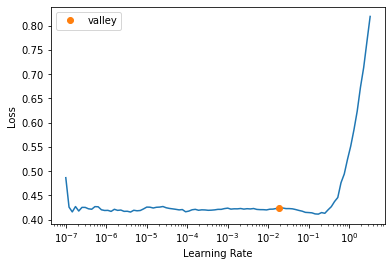

In [40]:
learn.lr_find()

#### On training the model through increasing number of epochs, we find that validation loss starts to increase after three epochs, showing risk of overfitting the model.

In [41]:
# Run the learner through increasing epochs, with a small weight decay for regularization
learn.fit_one_cycle(3, 0.07, wd=0.1)

epoch,train_loss,valid_loss,time
0,1.307703,1.354424,00:02
1,0.725842,0.632727,00:02
2,0.281939,0.414484,00:01


#### Analysis of latent factors

In [42]:
defender = merged_df_new[merged_df_new['Pos1'] == 'DF']
midfield = merged_df_new[merged_df_new['Pos1'] == 'MF']
forward = merged_df_new[merged_df_new['Pos1'] == 'FW']

In [43]:
sort = midfield.sort_values(by = ['Annual Wages'], ascending=False)
most_expensive_players = sort['Player'].values[:100]
most_expensive_players[:15]

array(['Kevin De Bruyne 22', 'Paul Pogba 22', "N'Golo Kanté 22",
       'Bruno Fernandes 22', 'Thomas Partey 22', 'Tanguy Ndombele 22',
       'Thiago Alcántara 22', 'Saúl Ñíguez 22', 'Son Heung-min 22',
       'Fabinho 22', 'Juan Mata 22', 'Mateo Kova?i? 22',
       'Bernardo Silva 22', 'Fernandinho 22', 'James Milner 22'],
      dtype=object)

In [44]:
# Get weights
player_weight = learn.model.weight(most_expensive_players, is_item=True)
player_weight.shape

torch.Size([100, 50])

In [45]:
# PCA to reduce the dimensions
player_pca = player_weight.pca(3)
player_pca.shape

torch.Size([100, 3])

In [46]:
fac0,fac1,fac2 = player_pca.t()
player_comp0 = [(f, i) for f,i in zip(fac0, most_expensive_players)]

In [47]:
# Highest scores on first dimension
sorted(player_comp0, key=itemgetter(0), reverse=True)[:10]

[(tensor(0.9596), 'Rodrigo 22'),
 (tensor(0.7477), 'Fernandinho 22'),
 (tensor(0.6945), 'Stuart Armstrong 22'),
 (tensor(0.6398), 'Oriol Romeu 22'),
 (tensor(0.5888), 'Nélson Semedo 22'),
 (tensor(0.5813), 'Emi Buendía 22'),
 (tensor(0.5749), 'Naby Keïta 22'),
 (tensor(0.5366), 'Mohamed Elneny 22'),
 (tensor(0.5192), 'Granit Xhaka 22'),
 (tensor(0.4984), 'Cheikhou Kouyaté 22')]

In [48]:
player_comp1 = [(f, i) for f,i in zip(fac1, most_expensive_players)]

In [49]:
# Highest scores on second dimension
sorted(player_comp1, key=itemgetter(0), reverse=True)[:10]

[(tensor(0.7887), 'Ayoze Pérez 22'),
 (tensor(0.6561), 'Thiago Alcántara 22'),
 (tensor(0.5227), 'Martin Ødegaard 22'),
 (tensor(0.5023), 'Moussa Djenepo 22'),
 (tensor(0.5020), 'Kevin De Bruyne 22'),
 (tensor(0.4971), 'Nélson Semedo 22'),
 (tensor(0.4961), 'Philippe Coutinho 22'),
 (tensor(0.4876), 'Emile Smith Rowe 22'),
 (tensor(0.4756), 'Jordan Henderson 22'),
 (tensor(0.4656), 'André Gomes 22')]

In [50]:
player_comp2 = [(f, i) for f,i in zip(fac2, most_expensive_players)]

In [51]:
# Highest scores on third dimension
sorted(player_comp2, key=itemgetter(0), reverse=True)[:10]

[(tensor(0.6654), 'Saúl Ñíguez 22'),
 (tensor(0.6606), 'Joelinton 22'),
 (tensor(0.6599), 'Ainsley Maitland-Niles 22'),
 (tensor(0.6111), 'Luka Milivojevi? 22'),
 (tensor(0.5654), 'Abdoulaye Doucouré 22'),
 (tensor(0.5505), '?lkay Gündo?an 22'),
 (tensor(0.5340), 'Mateo Kova?i? 22'),
 (tensor(0.4686), 'Mohamed Elyounoussi 22'),
 (tensor(0.4650), 'Theo Walcott 22'),
 (tensor(0.3994), 'Miguel Almirón 22')]

#### Plotting player similarity for the first two PCA-reduced dimensions. Midfield players only

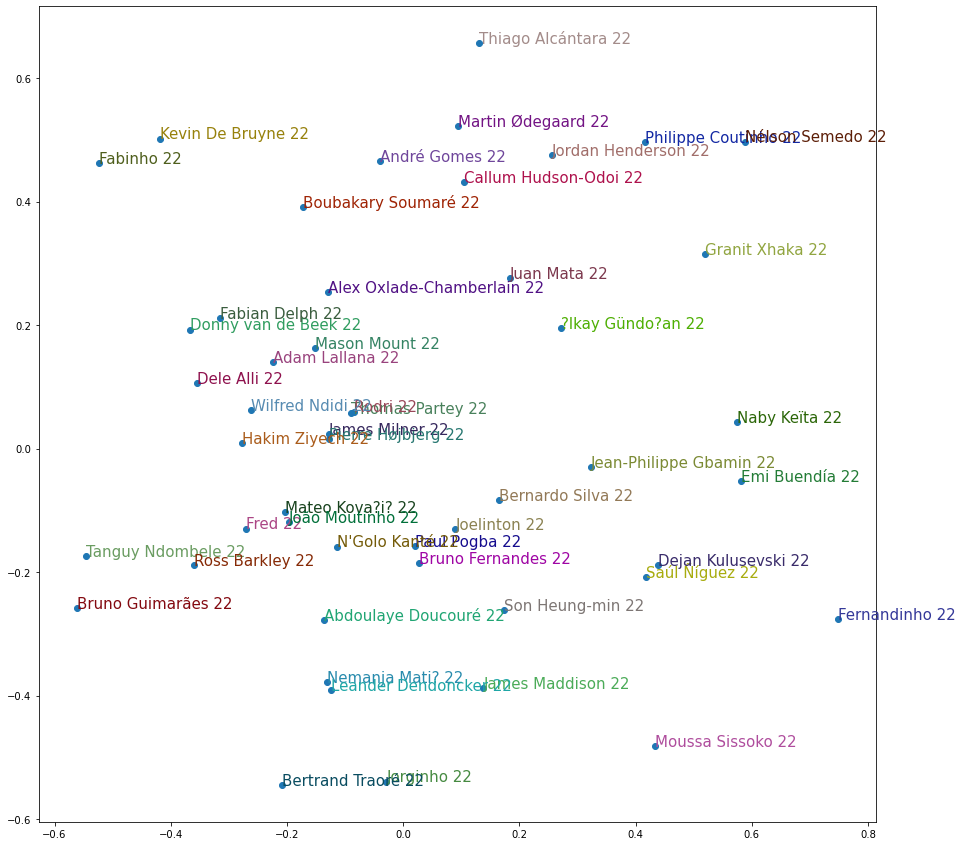

In [52]:
idxs = list(range(50))
X = fac0[idxs]
Y = fac1[idxs]
plt.figure(figsize=(15,15))
plt.scatter(X, Y)
for i, x, y in zip(most_expensive_players[idxs], X, Y):
    plt.text(x,y,i, color=np.random.rand(3)*0.7, fontsize=15)
plt.show()

### LightFM

In [53]:
from lightfm import LightFM
from lightfm.cross_validation import random_train_test_split
from lightfm.evaluation import precision_at_k
from lightfm.evaluation import auc_score

C:\Users\Bimal\anaconda3\lib\site-packages\lightfm\_lightfm_fast.py:9: UserWarning: LightFM was compiled without OpenMP support. Only a single thread will be used.
  warnings.warn(


#### LightFM requires the data on player features and player interactions to be reduced to sparse matrices.

In [54]:
# Round numbers to reduce columns required for CSR matrix
player_data_adjusted = player_data_train
for i in player_data_adjusted.columns:
    if max(player_data_adjusted[i]) > 100000:
        player_data_adjusted[i] = round(player_data_adjusted[i]/1000)
    if max(player_data_adjusted[i]) > 10000:
        player_data_adjusted[i] = round(player_data_adjusted[i]/100)
    if max(player_data_adjusted[i]) > 1000:
        player_data_adjusted[i] = round(player_data_adjusted[i]/10)
player_data_adjusted

,Sh_x,SoT,Cmp,Att,CrsPA,TO,Sh_y,GCA,TklW,Sh,Err,Def 3rd,Mid 3rd,TotDist,Int,Recov,Won
Player,,,,,,,,,,,,,,,,,
Gareth Bale 21,38.0,0.211111,28.0,42.0,3.0,9.0,3.0,6.0,10.0,2.0,0.0,8.0,25.0,23.0,8.0,38.0,23.0
Kevin De Bruyne 21,77.0,0.266667,108.0,143.0,10.0,10.0,5.0,18.0,21.0,1.0,0.0,10.0,72.0,59.0,9.0,116.0,4.0
David de Gea 21,0.0,0.000000,46.0,59.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,64.0,0.0,14.0,0.0,32.0,4.0
Raheem Sterling 21,69.0,0.311111,97.0,114.0,1.0,14.0,8.0,15.0,10.0,0.0,0.0,6.0,57.0,63.0,15.0,99.0,9.0
Paul Pogba 21,31.0,0.122222,111.0,137.0,1.0,2.0,5.0,7.0,26.0,2.0,0.0,32.0,88.0,50.0,26.0,148.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Levi Lumeka 18,1.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,0.0
Tyrese Campbell 18,2.0,0.011111,1.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,2.0
Michael Obafemi 18,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
player_data_adjusted_new = player_data_new
for i in player_data_adjusted_new.columns:
    if max(player_data_adjusted_new[i]) > 100000:
        player_data_adjusted_new[i] = round(player_data_adjusted_new[i]/1000)
    if max(player_data_adjusted_new[i]) > 10000:
        player_data_adjusted_new[i] = round(player_data_adjusted_new[i]/100)
    if max(player_data_adjusted_new[i]) > 1000:
        player_data_adjusted_new[i] = round(player_data_adjusted_new[i]/10)
player_data_adjusted_new

,Sh_x,SoT,Cmp,Att,CrsPA,TO,Sh_y,GCA,TklW,Sh,Err,Def 3rd,Mid 3rd,TotDist,Int,Recov,Won
Player,,,,,,,,,,,,,,,,,
Cristiano Ronaldo 22,107.0,0.433333,73.0,90.0,0.0,9.0,6.0,9.0,6.0,0.0,0.0,10.0,50.0,33.0,2.0,52.0,42.0
Kevin De Bruyne 22,78.0,0.344444,117.0,157.0,10.0,5.0,9.0,14.0,16.0,2.0,0.0,13.0,68.0,54.0,6.0,114.0,11.0
David de Gea 22,0.0,0.000000,68.0,92.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,102.0,0.0,24.0,0.0,30.0,8.0
Jadon Sancho 22,26.0,0.100000,80.0,98.0,7.0,9.0,2.0,9.0,8.0,0.0,3.0,15.0,45.0,55.0,15.0,112.0,2.0
Raphaël Varane 22,9.0,0.011111,101.0,116.0,0.0,0.0,0.0,2.0,19.0,9.0,1.0,64.0,66.0,47.0,18.0,78.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Jamie Shackleton 22,4.0,0.011111,35.0,41.0,0.0,0.0,1.0,1.0,16.0,7.0,1.0,19.0,22.0,13.0,8.0,50.0,5.0
Carney Chukwuemeka 22,4.0,0.011111,10.0,12.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,2.0,9.0,7.0,1.0,16.0,7.0
Sam Greenwood 22,4.0,0.000000,5.0,8.0,0.0,0.0,1.0,1.0,5.0,0.0,0.0,1.0,6.0,3.0,2.0,14.0,2.0


In [56]:
player_dict_new ={}
df = merged_df_new[['PlayerID', 'Player']].sort_values('Player').reset_index()
for i in range(df.shape[0]):
    player_dict_new[(df.loc[i,'Player'])] = df.loc[i,'Player']

In [57]:
# Create CSR matrix for player attributes
from scipy.sparse import csr_matrix
player_data_csr = csr_matrix(player_data_adjusted_new.values)
player_data_csr

<496x17 sparse matrix of type '<class 'numpy.float64'>'
	with 6778 stored elements in Compressed Sparse Row format>

In [58]:
# Create CSR matrix for player similarity interactions
player_interaction = pd.pivot_table(player_table, index='Player1', columns='Player2', values='Similarity')
player_interaction = player_interaction.fillna(0) # fill missing values with 0
player1_id = list(player_interaction.index)
player_dict = {}
counter = 0 
for i in player1_id:
    player_dict[i] = counter
    counter += 1
player_interaction_csr = csr_matrix(player_interaction.values)
player_interaction_csr

<1921x496 sparse matrix of type '<class 'numpy.float64'>'
	with 19989 stored elements in Compressed Sparse Row format>

#### Fitting the model using Bayesian Personalised Ranking as loss function, which maximizes AUC.

In [59]:
# Model fitting
model_lfm = LightFM(loss='bpr',
                random_state=2016,
                learning_rate=0.90,
                no_components=150,
                user_alpha=0.000005)
model_lfm = model_lfm.fit(player_interaction_csr,
                  epochs=100,
                  num_threads=16, verbose=False)

In [60]:
# Train-test split
train_data, test_data = random_train_test_split(player_interaction_csr, 
                                                test_percentage=0.2, random_state=0)

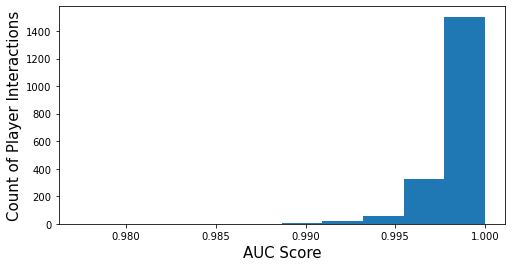

Mean AUC:  0.9985556


In [61]:
# Model evaluation
# AUC Score
auc = auc_score(model_lfm, train_data, test_data)
# Plot distribution of prediction errors
plt.figure(figsize=(8,4))
ax = plt.axes()
plt.hist(auc)
plt.xlabel('AUC Score', fontsize=15)
plt.ylabel('Count of Player Interactions', fontsize=15)
plt.show()
print("Mean AUC: ",np.mean(auc))

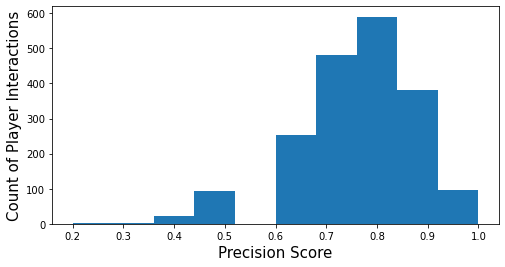

Mean Precision:  0.758355


In [62]:
# Model evaluation
# Precision @k
prec = precision_at_k(model_lfm, train_data, test_data)
# Plot distribution of prediction errors
plt.figure(figsize=(8,4))
ax = plt.axes()
plt.hist(prec)
plt.xlabel('Precision Score', fontsize=15)
plt.ylabel('Count of Player Interactions', fontsize=15)
plt.show()
print("Mean Precision: ",np.mean(prec))

#### Using the fitted model, we are able to make recommendations for individual players selected.

In [63]:
# Sample recommendations
def sample_recommendation_user(model_lfm, interactions, player1_id, player_dict, 
                               player_dict_new,threshold = 0,nrec_items = 5, show = True):
    
    n_player1, n_player2 = interactions.shape
    player1_x = player_dict[player1_id]
    scores = pd.Series(model_lfm.predict(player1_x,np.arange(n_player2), item_features=player_data_csr))
    scores.index = interactions.columns
    scores = list(pd.Series(scores.sort_values(ascending=False).index))
    
    known_items = list(pd.Series(interactions.loc[player1_id,:] \
                                 [interactions.loc[player1_id,:] > threshold].index).sort_values(ascending=False))
    
    scores = [x for x in scores if x not in known_items]
    return_score_list = scores[0:nrec_items]
    known_items = list(pd.Series(known_items).apply(lambda x: player_dict_new[x]))
    scores = list(pd.Series(return_score_list).apply(lambda x: player_dict_new[x]))
    if show == True:
        print ("Benchmark: " + str(player1_id))
        print("Known Similar:")
        counter = 1
        for i in known_items:
            print(str(counter) + '- ' + i)
            counter+=1
    print("\n Recommended Items:")
    counter = 1
    for i in scores:
        print(str(counter) + '- ' + i)
        counter+=1

In [64]:
sample_recommendation_user(model_lfm, player_interaction, 'Sadio Mané 21', player_dict, player_dict_new)

Benchmark: Sadio Mané 21
Known Similar:
1- Wilfried Zaha 22
2- Steven Bergwijn 22
3- Son Heung-min 22
4- Pedro Neto 22
5- Jacob Ramsey 22
6- Jack Grealish 22
7- Harvey Barnes 22
8- Dwight McNeil 22
9- Demarai Gray 22
10- Bukayo Saka 22
11- Anwar El Ghazi 22

 Recommended Items:
1- Sean Longstaff 22
2- Carney Chukwuemeka 22
3- Cenk Tosun 22
4- Phil Foden 22
5- Leon Bailey 22
